# Análisis para la tienda online Ice para la campaña de 2017
## Proyecto Sprint 6
Para realizar el proyecto se empezó con la preparación de los datos y finalizó con las pruebas de hipótesis específicas. A continuación se presenta el análisis:

## Carga y Preparación de los Datos
Se importaron las librerías que se necesitarían en el análisis y se cargo el archivo CSV.
Se realiza un vistazo rápido de los datos y búsqueda de duplicados completos.

In [1]:
import pandas as pd
from matplotlib import pyplot as plt
import numpy as np
import seaborn as sns
from scipy import stats as st

In [2]:
# Carga del archivo
df = pd.read_csv('/datasets/games.csv')

# Cambio de las columnas a minsuculas
df.columns=df.columns.str.lower()

# Obtener información del archivo cargado
print('Información del DataFrame:\n')
df.info()
print('\nMuestra del DataFrame:\n')
print(df.sample(10))
print('\nCeldas Duplicadas:')
print(df.duplicated().sum())

Información del DataFrame:

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16715 entries, 0 to 16714
Data columns (total 11 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   name             16713 non-null  object 
 1   platform         16715 non-null  object 
 2   year_of_release  16446 non-null  float64
 3   genre            16713 non-null  object 
 4   na_sales         16715 non-null  float64
 5   eu_sales         16715 non-null  float64
 6   jp_sales         16715 non-null  float64
 7   other_sales      16715 non-null  float64
 8   critic_score     8137 non-null   float64
 9   user_score       10014 non-null  object 
 10  rating           9949 non-null   object 
dtypes: float64(6), object(5)
memory usage: 1.4+ MB

Muestra del DataFrame:

                                             name platform  year_of_release  \
15044                  Spy Hunter: Nowhere To Run      PS2           2006.0   
14435                 Combat M

### Valores ausentes y tipos de datos:
Se observó lo siguiente:
* __year_of_release:__ Los registros sin año de lanzamiento se eliminaron, este dato era necesario para el análisis. El tipo de dato se convirtió a entero.
* __user_score:__ La abreviatura 'tbd' (puntuación pendiente), se cambió a valor ausente (NaN) para que no afecte en los cálculos y se pueda convertir la columna a un tipo numérico.
* __rating:__ Los valores ausentes en la clasificación ESRB se dejaron como tal (NaN), esto para facilitar el análisis usando el método .dropna para obtener solo las filas con datos en su clasificación.
* __name:__ Tiene valores faltantes, se dejan como tal porque no afectaran en el análisis, se quedan fuera después de filtrar los datos.

Por qué hay valores ausentes:
* __TBD:__ Puntuaciones no determinadas al momento de obtener la base de datos.
* __critic/user_score:__ Videojuegos exclusivos, venta exclusiva en alguna región o prohibido en otras.
* __Año:__ Videojuegos con años diferentes de lanzamiento por región y no colocaron el año, sin conocimiento del año de lanzamiento.
* __Ventas:__ Reportes parcial, se toma la base de datos antes de completar el año.

In [3]:
# Año a numérico
df['year_of_release']=pd.to_numeric(df['year_of_release'],errors='coerce')

# Si no hay año no funciona para el analisis de tiempo, se elimina
df.dropna(subset=['year_of_release'],inplace=True)

# Convertir a entero
df['year_of_release'] = df['year_of_release'].astype('int')

In [4]:
# Convertir user_score a tipo flotante reemplazando 'tbd' por NaN
df['user_score'] = df['user_score'].replace('tbd',np.nan)

# Convertir 'user_score' a tipo flotante
df['user_score'] = df['user_score'].astype(float)

In [5]:
# Observar los cambios realizados en el tipo
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 16446 entries, 0 to 16714
Data columns (total 11 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   name             16444 non-null  object 
 1   platform         16446 non-null  object 
 2   year_of_release  16446 non-null  int64  
 3   genre            16444 non-null  object 
 4   na_sales         16446 non-null  float64
 5   eu_sales         16446 non-null  float64
 6   jp_sales         16446 non-null  float64
 7   other_sales      16446 non-null  float64
 8   critic_score     7983 non-null   float64
 9   user_score       7463 non-null   float64
 10  rating           9768 non-null   object 
dtypes: float64(6), int64(1), object(4)
memory usage: 1.5+ MB


## Cálculo de ventas totales
Se calcula las ventas totales (suma de las ventas de todas las regiones) y se coloca en una columna separada.

In [6]:
# Nueva columna con la suma de las ventas
df['total_sales']=df[['na_sales','eu_sales','jp_sales','other_sales']].sum(axis=1)

## Análisis de los datos
### Juegos lanzados por periodo
Análisis histórico de los lanzamientos de juegos:

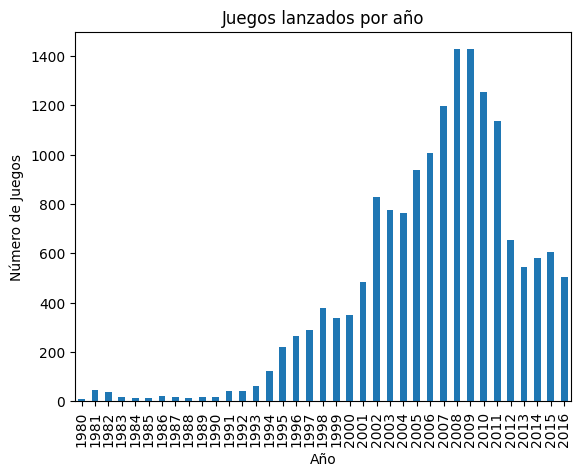

In [7]:
# Obtener la cantidad de videojuegos lanzada por año
games_by_year=df['year_of_release'].value_counts().sort_index()
# Graficar
games_by_year.plot(kind='bar',xlabel='Año',ylabel='Número de Juegos',title='Juegos lanzados por año')
plt.show()

Se observa un pico entre 2008 y 2011, seguido de una disminución. Lo que sugiere una consolidación en el mercado. Los datos más recientes son los más relevantes para nuestro análisis.

## Ciclo de Vida de las Plataformas
Se observa la mayor concentración de ventas en PlayStation 2 y Xbox 360, muy populares, pero recientemente ya no se registran ventas significativas. Por lo tanto, las plataformas de videojuegos suelen tener un ciclo de vida de aproximadamente 5-10 años.

In [8]:
# Obtener las ventas totales de cada plataforma
ventas_plataforma=df.groupby(['platform'])['total_sales'].sum().sort_values(ascending=False)
# Obtener el top de las consolas con más ventas
top_plataformas = ventas_plataforma.head(10).reset_index()
print('Plataformas con mayores ventas totales (millones USD):\n',top_plataformas)

Plataformas con mayores ventas totales (millones USD):
   platform  total_sales
0      PS2      1233.56
1     X360       961.24
2      PS3       931.34
3      Wii       891.18
4       DS       802.78
5       PS       727.58
6      PS4       314.14
7      GBA       312.88
8      PSP       289.53
9      3DS       257.81


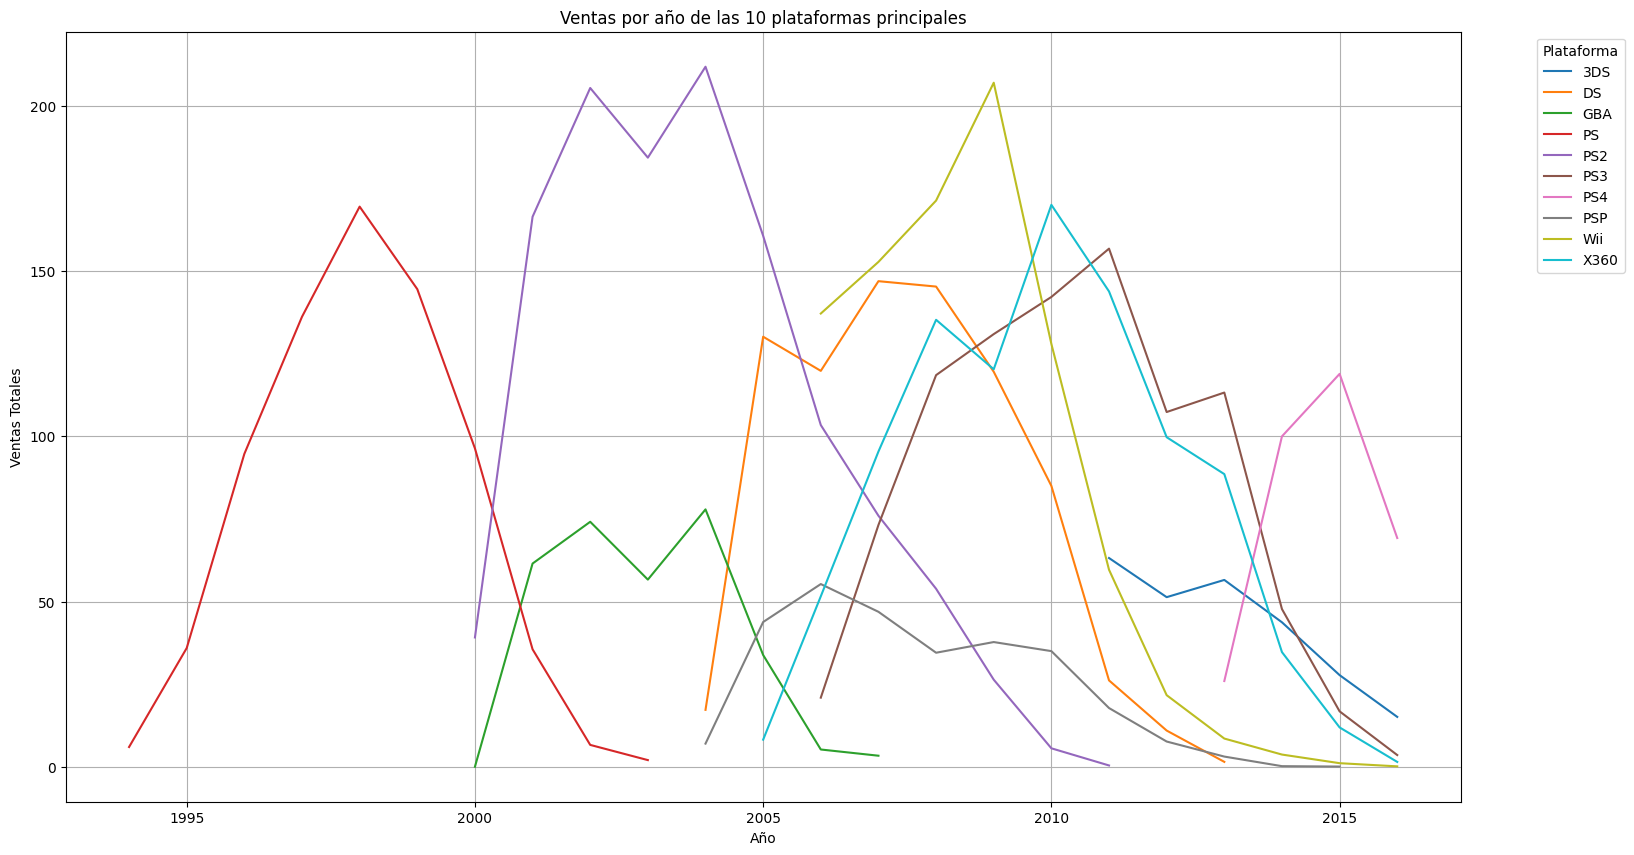

In [9]:
# Filtrar por nombre de la plataforma en nuestro top 10 de ventas
sales_plat_year=df[df['platform'].isin(top_plataformas['platform'])]
# Crear una tabla dinámica con los datos de ventas por año de esas plataformas
sales_plat_year=sales_plat_year.pivot_table(
    index='year_of_release',
    columns='platform',
    values='total_sales',
    aggfunc='sum')
#Se detecta que el nintendo DS tiene ventas registradas en 1985, un error, se elimina
sales_plat_year.drop(1985,inplace=True)
#Graficar
sales_plat_year.plot(
    xlabel='Año',
    ylabel='Ventas Totales',
    title='Ventas por año de las 10 plataformas principales',
    figsize=(18,10))
plt.legend(title='Plataforma', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.grid(True)
plt.show()

Para predecir las tendencias de 2017, se toma el período de 2012 a 2016 (5 años) para realizar el análisis, ya que abarca el año en que se consolidó el mercado y el ciclo de vida de las consolas.

In [10]:
# Obtener el top de consolas del periodo
plataformas_recientes = df[df['year_of_release'] >= 2012].groupby('platform')['total_sales'].sum().sort_values(ascending=False).reset_index()
print("Plataformas con mayor venta (2012-2016):\n")
print(plataformas_recientes.head(10))

Plataformas con mayor venta (2012-2016):

  platform  total_sales
0      PS4       314.14
1      PS3       288.79
2     X360       236.54
3      3DS       194.61
4     XOne       159.32
5     WiiU        82.19
6       PC        62.65
7      PSV        49.18
8      Wii        35.37
9       DS        12.55


Las plataformas líderes en ventas son la PlayStation 4, PlayStation 3 (con ventas cayendo por su sucesora PS4), Xbox y Nintendo 3DS.

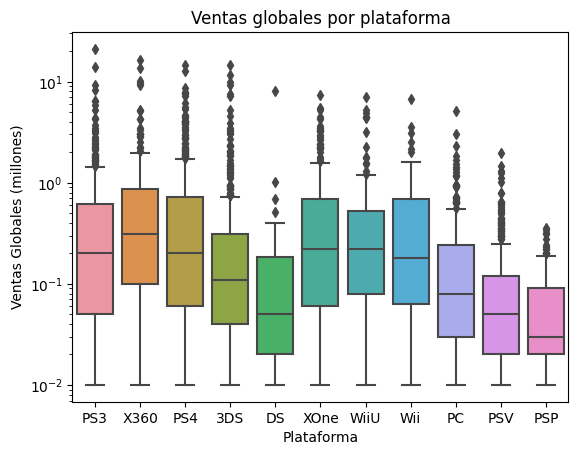

<Figure size 2000x1000 with 0 Axes>

In [11]:
# Obtener solo datos del 2012 en adelante y guardar en un DataFrame
df_platform_reciente=df[df['year_of_release'] >= 2012]
# Grafico de caja y bigotes para las consolas top de ventas del periodo
sns.boxplot(data=df_platform_reciente[df_platform_reciente['platform'].isin(plataformas_recientes['platform'])], x='platform', y='total_sales')
plt.yscale('log') # Se usa escala logaritmica para visualizar mejor los datos
plt.title('Ventas globales por plataforma')
plt.ylabel('Ventas Globales (millones)')
plt.xlabel('Plataforma')
plt.figure(figsize=(20,10))
plt.show()

La mayoría de las plataformas tienen ventas moderadas, existen valores atípicos extremos, lo que se refiere a un éxito comercial masivo, lanzamiento de algún juego muy popular o juegos exclusivos para la plataforma. PlayStation, Xbox y Wii muestran una mediana de ventas por juego más alta en comparación con otras plataformas.

## Impacto de las Reseñas de Usuarios en las Venta
Se escogió la plataforma PS4 encontrando lo siguiente:

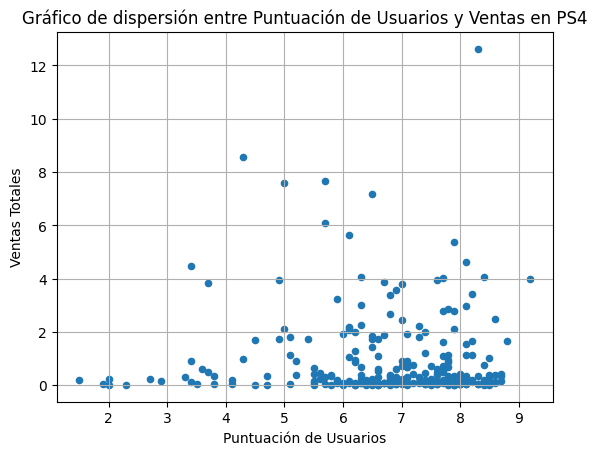


Correlación entre puntuación de usuarios y ventas en PS4: -0.03362497596528878


In [12]:
# Correlación entre reseñas de usuarios y ventas para PS4
# Se eliminan los valores ausentes con los filtros aplicados
df_ps4 = df_platform_reciente[
    (df_platform_reciente['platform'] == 'PS4') & 
    (df_platform_reciente['critic_score'] > 0) & 
    (df_platform_reciente['user_score'] > 0) & 
    (df_platform_reciente['year_of_release']>=2012)]
# Grafico de dispersión
df_ps4.plot(kind='scatter',
    x='user_score', 
    y='total_sales',
    title='Gráfico de dispersión entre Puntuación de Usuarios y Ventas en PS4',
    xlabel='Puntuación de Usuarios',
    ylabel='Ventas Totales')
plt.grid(True)
plt.show()
# Correlación
print(f"\nCorrelación entre puntuación de usuarios y ventas en PS4: {df_ps4['user_score'].corr(df_ps4['total_sales'])}")

La correlación entre la puntuación de los usuarios (user_score) y las ventas es muy débil, casi cero. Lo que indica que, si bien las reseñas de los usuarios son importantes, estas no tienen tanta influencia en el éxito comercial de un juego en la PS4.

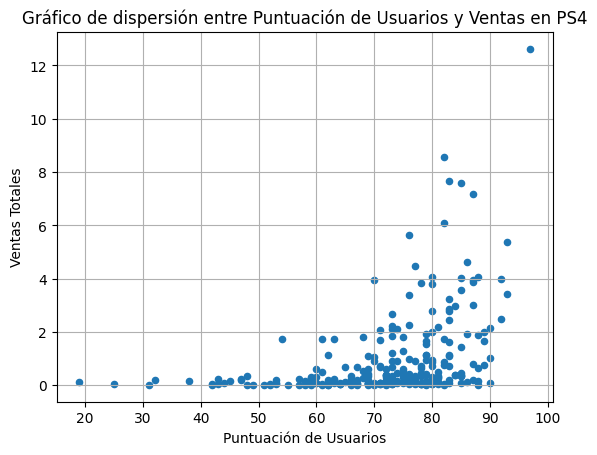


Correlación entre puntuación de profesionales y ventas en PS4: 0.40589480145836687


In [13]:
# Correlación entre reseñas de profesionales y ventas para PS4
# Grafico de Dispersión
df_ps4.plot(kind='scatter',
    x='critic_score', 
    y='total_sales',
    title='Gráfico de dispersión entre Puntuación de Usuarios y Ventas en PS4',
    xlabel='Puntuación de Usuarios',
    ylabel='Ventas Totales')
plt.grid(True)
plt.show()
# Correlación
print(f"\nCorrelación entre puntuación de profesionales y ventas en PS4: {df_ps4['critic_score'].corr(df_ps4['total_sales'])}")

Existe una correlación positiva moderada entre la puntuación de los críticos (critic_score) y las ventas. Las puntuaciones de la crítica especializada tienen una mayor influencia en el éxito comercial de un juego en la PS4.

## Ventas del mismo juego en distintas plataformas
La comparativa nos permite saber qué título rinde mejor históricamente en alguna plataforma en especifico.

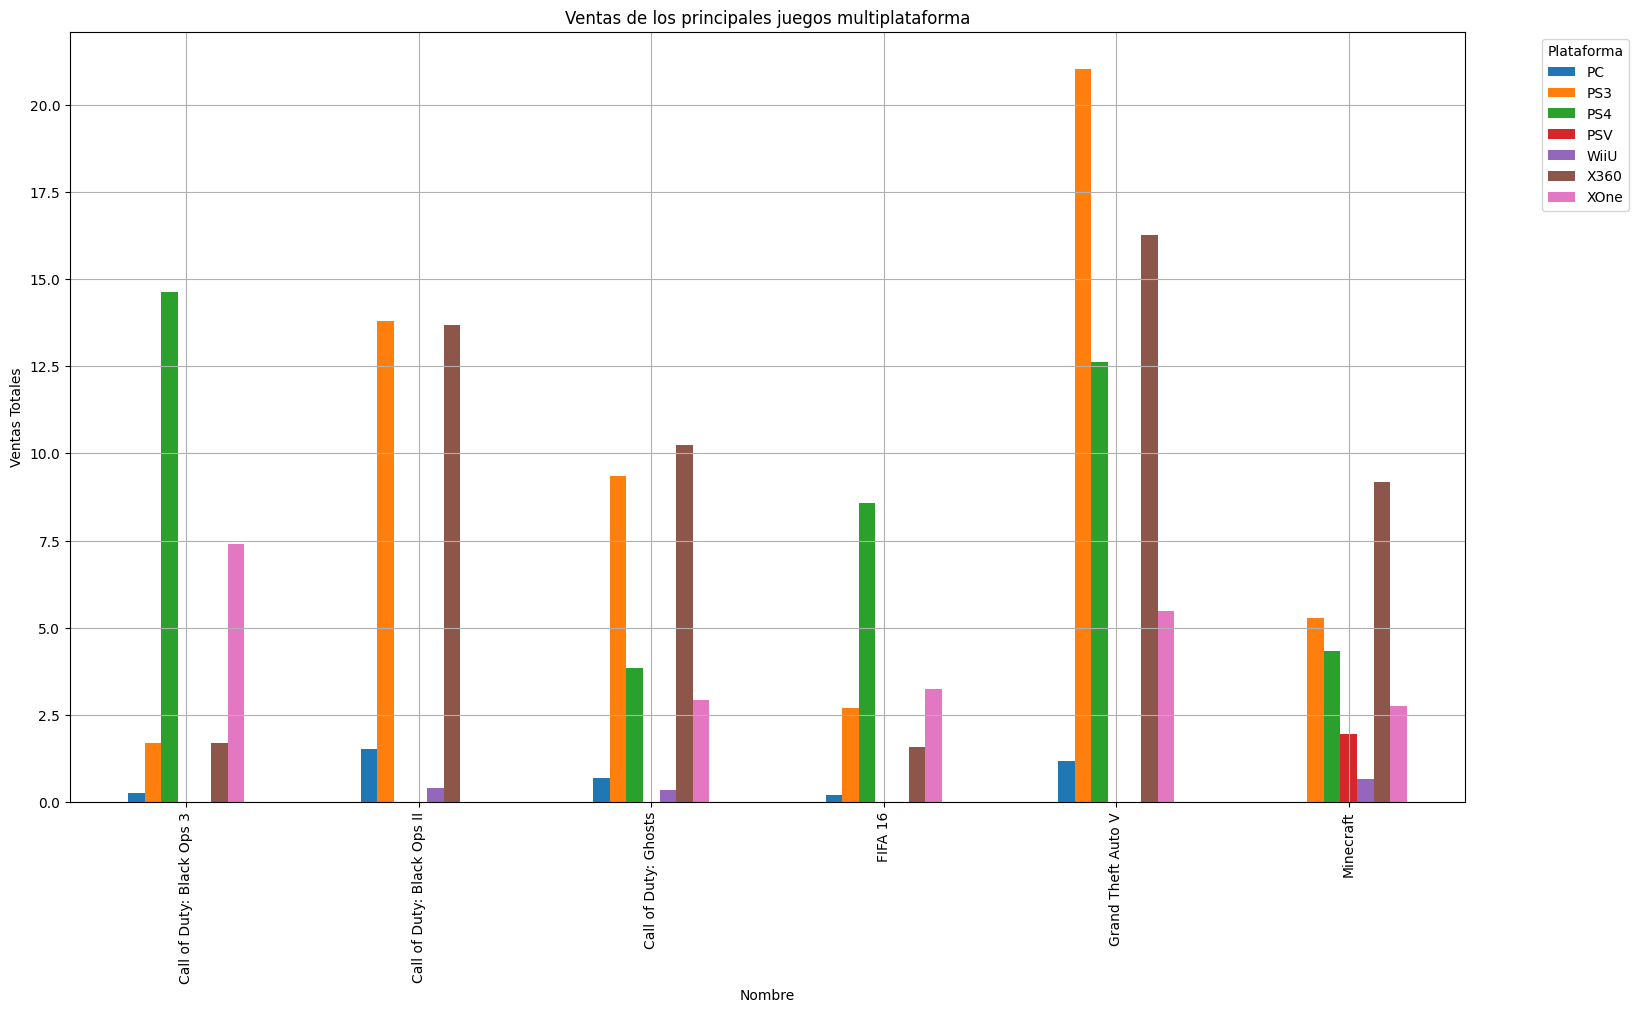


Ventas juegos multiplataforma:

platform                      PC    PS3    PS4   PSV  WiiU   X360  XOne
name                                                                   
Call of Duty: Black Ops 3   0.26   1.69  14.63   NaN   NaN   1.70  7.39
Call of Duty: Black Ops II  1.52  13.79    NaN   NaN  0.41  13.68   NaN
Call of Duty: Ghosts        0.69   9.36   3.83   NaN  0.35  10.24  2.92
FIFA 16                     0.20   2.70   8.58   NaN   NaN   1.57  3.25
Grand Theft Auto V          1.17  21.05  12.62   NaN   NaN  16.27  5.47
Minecraft                    NaN   5.27   4.32  1.96  0.67   9.18  2.76


In [14]:
# Comparacion ventas de los mismos juegos en otras plataformas
# Obtener los juegos lanzados en más de 1 plataforma
juegos_multi=df_platform_reciente.groupby(['name'])['platform'].nunique().reset_index()
juegos_multi=juegos_multi[juegos_multi['platform']>1]

# Obtener el top de ventas de los juegos multiplataforma
juegos_multi_sales = df_platform_reciente[df_platform_reciente['name'].isin(juegos_multi['name'])]
juegos_multi_sales = juegos_multi_sales.groupby(['name','platform'])['total_sales'].sum().reset_index().sort_values('total_sales', ascending=False).head(10)
top_multi=juegos_multi_sales['name']
juegos_multi_sales =df_platform_reciente[df_platform_reciente['name'].isin(top_multi)]

# Graficar ventas por plataforma del top de juegos
juegos_multi_sales = juegos_multi_sales.pivot(index='name', columns='platform', values='total_sales')
juegos_multi_sales.plot(kind='bar',
    xlabel='Nombre',
    ylabel='Ventas Totales',
    title='Ventas de los principales juegos multiplataforma',
    figsize=(18,10))
plt.legend(title='Plataforma', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.grid(True)
plt.show()
print('\nVentas juegos multiplataforma:\n')
print(juegos_multi_sales)

Con los datos arrojados, se oberva que hay títulos que se lanzaron en exclusiva para algunas plataformas, demostrado en las mayores ventas, por ejemplo, GTA V que salió en exclusiva para PS3 y X360 para luego lanzarse en PS4 y XOne y al final para PC por lo que las ventas de estas ultimas fueron menores. Titulos populares sin ventas en consolas de Nintendo debido a la exclusividad de algunos títulos y público objetivo (Nintendo pensado mayormente para niños y familia).

## Distribución general de los juegos por género
Primero se determina la cantidad de juegos por género, observando que los géneros de acción, de rol, aventuras, deportes y disparos encabezan la lista.

Action          1031
Role-Playing     370
Adventure        302
Sports           268
Shooter          235
Misc             192
Racing           115
Fighting         109
Platform          85
Simulation        80
Strategy          71
Puzzle            28
Name: genre, dtype: int64


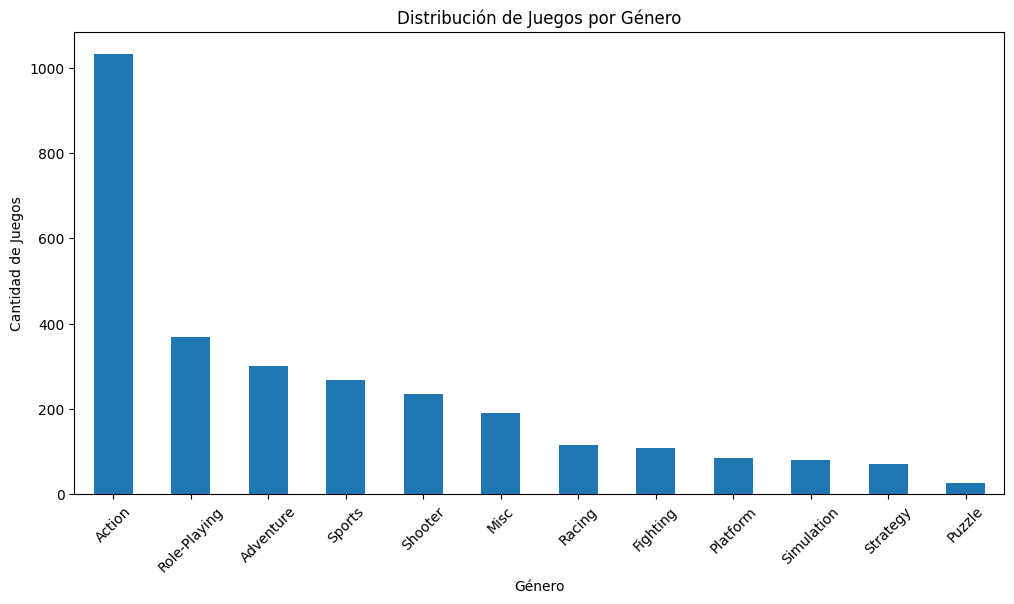

In [15]:
# Distribución de cantidad de juegos por género
distribucion_generos = df_platform_reciente['genre'].value_counts()
print(distribucion_generos)

# Gráfico de barras de la cantidad de juegos por género
distribucion_generos.plot(kind='bar', figsize=(12, 6))
plt.title('Distribución de Juegos por Género')
plt.ylabel('Cantidad de Juegos')
plt.xlabel('Género')
plt.xticks(rotation=45)
plt.show()

Se determina las ventas que generan cada género:

genre
Action          441.12
Shooter         304.73
Role-Playing    192.80
Sports          181.07
Misc             85.04
Platform         61.00
Racing           53.50
Fighting         44.49
Simulation       35.12
Adventure        29.43
Strategy         13.34
Puzzle            4.89
Name: total_sales, dtype: float64


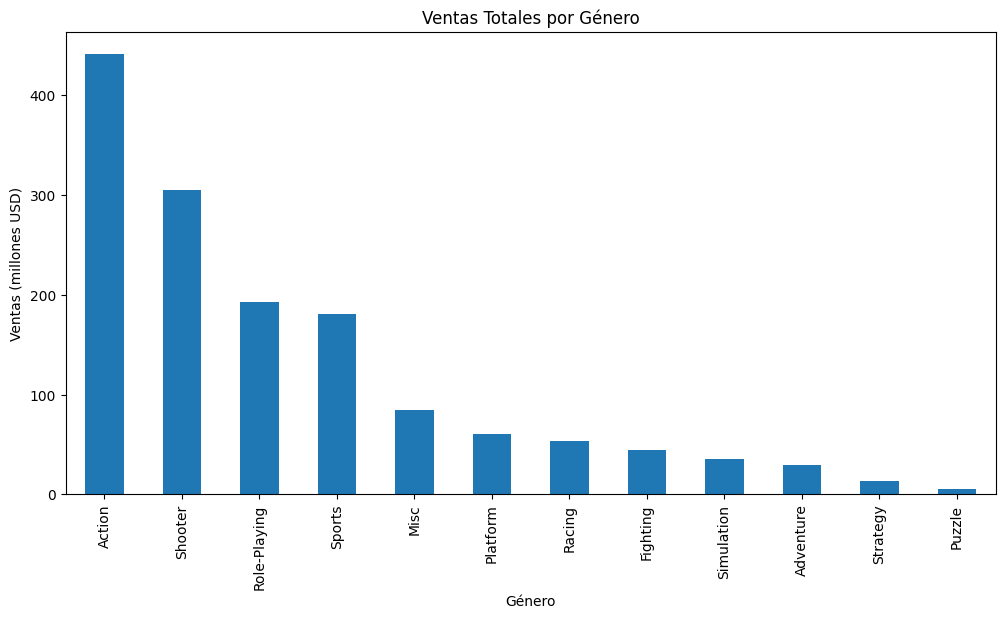

In [16]:
# Ventas por género
ventas_genero=df_platform_reciente.groupby('genre')['total_sales'].sum().sort_values(ascending=False)
print(ventas_genero)

# Gráfico de ventas totales por género
ventas_genero.plot(kind='bar', figsize=(12, 6))
plt.title('Ventas Totales por Género')
plt.ylabel('Ventas (millones USD)')
plt.xlabel('Género')
plt.show()

Se observa que, aunque haya muchos juegos lanzados de un solo género, no signfica que tenga buena remuneración. Por ejemplo, el género de disparos que existen alrededor de 200 juegos lanzados pero generó un ingreso mayor que varios géneros con más títulos lanzados. Se busca las ventas promedio para obtener qué género es más rentable.

genre
Shooter         1.296723
Platform        0.717647
Sports          0.675634
Role-Playing    0.521081
Racing          0.465217
Misc            0.442917
Simulation      0.439000
Action          0.427856
Fighting        0.408165
Strategy        0.187887
Puzzle          0.174643
Adventure       0.097450
Name: total_sales, dtype: float64


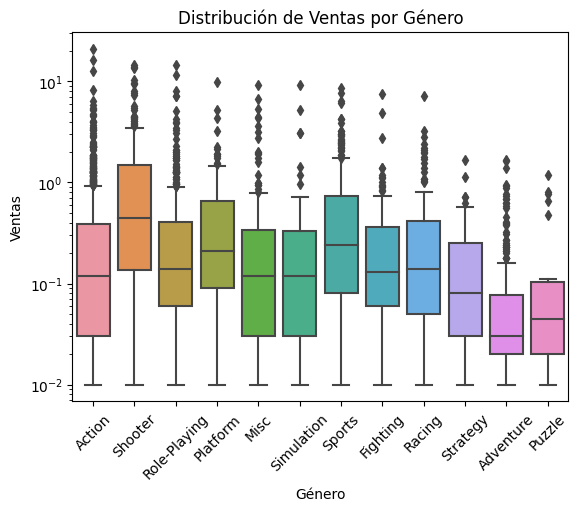

In [17]:
# Ventas promedio por género
ventas_promedio = df_platform_reciente.groupby('genre')['total_sales'].mean().sort_values(ascending=False)
print(ventas_promedio)

# Diagrama de caja y bigotes para comparar distribución
sns.boxplot(data=df_platform_reciente, y='total_sales', x='genre')
plt.yscale('log')
plt.figsize=(50, 20)
plt.title('Distribución de Ventas por Género')
plt.ylabel('Ventas')
plt.xlabel('Género')
plt.xticks(rotation=45)
plt.show()

El género de disparos es el que tiene mayor mediana que los demás, indicando altas ventas. El género de acción tiene valores atípicos muy extremos, lo que podría indicar a un videojuego de acción muy popular que se vendió demasiado y, al ver la cantidad de juegos lanzados de ese género, se observa que han querido replicar su éxito lanzando varios videojuegos de acción.

## Perfil regional para los usuarios
Se determinan las ventas y cuota de mercado para las 3 regiones: Norteamerica (NA), Europa (UE) y Japón (JP)

In [18]:
# Ventas por plataforma en Norteamérica
ventas_na = df_platform_reciente.groupby('platform')['na_sales'].sum().sort_values(ascending=False)
top5_na = ventas_na.head(5)
# Ventas por plataforma en Europa
ventas_eu = df_platform_reciente.groupby('platform')['eu_sales'].sum().sort_values(ascending=False)
top5_eu = ventas_eu.head(5)
# Ventas por plataforma en Japón
ventas_jp = df_platform_reciente.groupby('platform')['jp_sales'].sum().sort_values(ascending=False)
top5_jp = ventas_jp.head(5)

# Cuotas de mercado en NA
total_na = df_platform_reciente['na_sales'].sum()
cuotas_na = (top5_na / total_na * 100).round(2)
# Cuotas de mercado en EU
total_eu = df_platform_reciente['eu_sales'].sum()
cuotas_eu = (top5_eu / total_eu * 100).round(2)
# Cuotas de mercado en JP
total_jp = df_platform_reciente['jp_sales'].sum()
cuotas_jp = (top5_jp / total_jp * 100).round(2)

# Tabla comparativa
tabla_na = pd.DataFrame({'Ventas_NA':top5_na,'Cuota_NA (%)':cuotas_na})
tabla_eu = pd.DataFrame({'Ventas_EU':top5_eu,'Cuota_EU (%)':cuotas_eu})
tabla_jp = pd.DataFrame({'Ventas_JP':top5_jp,'Cuota_JP (%)':cuotas_jp})
tabla_comparativa = pd.concat([tabla_na, tabla_eu, tabla_jp], axis=1)
print(tabla_comparativa)

# Top generos NA
top5_genre_NA=df_platform_reciente.groupby('genre')['na_sales'].sum().sort_values(ascending=False).head(5)
# Top generos EU
top5_genre_EU=df_platform_reciente.groupby('genre')['eu_sales'].sum().sort_values(ascending=False).head(5)
# Top generos NA
top5_genre_JP=df_platform_reciente.groupby('genre')['jp_sales'].sum().sort_values(ascending=False).head(5)

print(f'\nTop Géneros en Norteamérica:\n{top5_genre_NA}')
print(f'\nTop Géneros en Europa:\n{top5_genre_EU}')
print(f'\nTop Géneros en Japón:\n{top5_genre_JP}')

          Ventas_NA  Cuota_NA (%)  Ventas_EU  Cuota_EU (%)  Ventas_JP  \
platform                                                                
X360         140.05         23.70      74.52         14.70        NaN   
PS4          108.74         18.40     141.09         27.84      15.96   
PS3          103.38         17.49     106.86         21.08      35.29   
XOne          93.12         15.76      51.59         10.18        NaN   
3DS           55.31          9.36      42.64          8.41      87.79   
PSV             NaN           NaN        NaN           NaN      21.04   
WiiU            NaN           NaN        NaN           NaN      13.01   

          Cuota_JP (%)  
platform                
X360               NaN  
PS4               8.29  
PS3              18.32  
XOne               NaN  
3DS              45.59  
PSV              10.93  
WiiU              6.76  

Top Géneros en Norteamérica:
genre
Action          177.84
Shooter         144.77
Sports           81.53
Role-Playing

Se observa que Norteamérica encabeza el top, teniendo a la consola Xbox como preferida, siguiendo la PlayStation. Esto podría ser a un tema de importación, las consolas creadas en su territorio son más baratas, también a un tema de patriotismo en el que se apoya lo generado en la región. Esto se observa también en Japón donde las consolas japonesas son las dominantes en el mercado, también en esta región se observa mayor preferencia por las consolas portátiles (3DS y PSV) teniendo mejores ventas que todas las consolas de escritorio juntas. Europa muestra mayor interés en las consolas de escritorio (mayores ventas) que en las portátiles, mostrando preferencia para la PS4 y PS3; esta preferencia a la consolas japonesas podría ser a cierto resentimiento contra NA y a falta de consolas hechas en EU apoyan a las japonesas.

Tanto Norteamérica como Europa tiene preferencia por los géneros de acción, disparos y deportes. Mientras que Japón demuestra mayor preferencia para los juegos de rol, seguido del género de acción; aquí aparecen géneros como peleas y simulación. En Europa aparece el género de carreras en su top, podría ser por la cultura automovilística de la región (Grand Turismo, F1) y facilidad para conseguir las licencias de uso (autos de carrera mayormente fabricados en Europa).

## Clasificaciones de ESRB por región
Se observa que las ventas son afectadas por la clasificación ERSB del videojuego.


Ventas por Clasificación ESRB:
        na_sales  eu_sales  jp_sales
rating                              
M         231.57    193.96     21.20
E         114.37    113.03     28.33
E10+       75.70     55.37      8.19
T          66.02     52.96     26.02


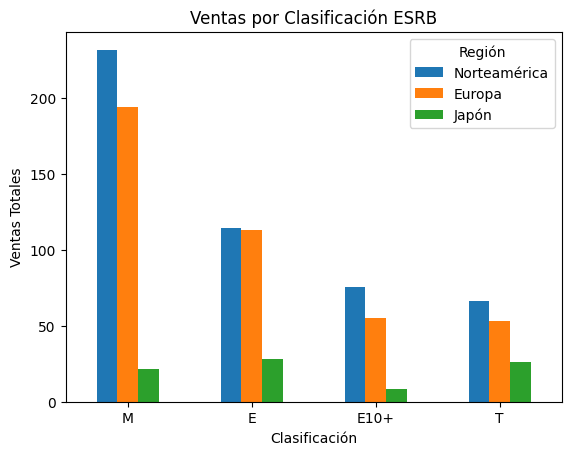

In [19]:
# Clasificaciones ESRB
# Obtener las ventas de cada región agrupada por su clasificación ESRB
esrb_sales_na = df_platform_reciente.groupby('rating')['na_sales'].sum().sort_values(ascending=False)
esrb_sales_eu = df_platform_reciente.groupby('rating')['eu_sales'].sum().sort_values(ascending=False)
esrb_sales_jp = df_platform_reciente.groupby('rating')['jp_sales'].sum().sort_values(ascending=False)
esrb_tabla= pd.concat([esrb_sales_na, esrb_sales_eu, esrb_sales_jp], axis=1)
# Gráfico
print("\nVentas por Clasificación ESRB:")
print(esrb_tabla)
esrb_tabla.plot(kind='bar',
    rot=0,
    xlabel='Clasificación',
    ylabel='Ventas Totales',
    title='Ventas por Clasificación ESRB',
)
plt.legend(['Norteamérica', 'Europa', 'Japón'], title='Región')
plt.show()

Las clasificaciones ESRB tienen un impacto diferente en cada región, refleja diferencias culturales en las preferencias de juego. Adolescentes (T) y Adultos (M) suelen concentrar ventas en norteamérica y europa, mientras que en japón domina la clasificación para todo público (E)

## Prueba de hipótesis de las calificaciones XOne y PC

Se utilizó un nivel de significancia (alfa) de 0.05
* __Hipótesis Nula (H0):__ Las calificaciones promedio de los usuarios para las plataformas Xbox One y PC son las misma.
* __Hipótesis Alternativa (H1):__ Las calificaciones promedio son diferentes.

In [20]:
# Obtener el user_score de XOne y PC, se hizo .dropna para eliminar aquellos datos faltantes
xone_scores=df_platform_reciente[df_platform_reciente['platform']=='XOne']['user_score'].dropna()
pc_scores=df_platform_reciente[df_platform_reciente['platform']=='PC']['user_score'].dropna()
# Se calculan las varianzas
print('Varianza para XOne:', xone_scores.var())
print('Varianza para PC:', pc_scores.var())

# Establecer el nivel de significancia
alpha=0.05

# Prueba de Hipotesis
#Para probar la hipótesis de que las medias de dos poblaciones estadísticas son iguales
#según las muestras tomadas de ellas, se aplica la función 
#scipy.stats.ttest_ind(array1, array2, equal_var)
results = st.ttest_ind(xone_scores, pc_scores, equal_var=False)
valor_p=results.pvalue
print('Valor P:', valor_p)
if valor_p < alpha:
    print("Rechazamos la hipótesis nula")
else:
    print("No podemos rechazar la hipótesis nula")

Varianza para XOne: 1.9069968429360695
Varianza para PC: 2.770443997158418
Valor P: 0.5489537965134912
No podemos rechazar la hipótesis nula


No se puede rechazar la hipótesis nula. No existe diferencia estadísticamente significativa entre las calificaciones promedio de los usuarios para Xbox One y PC.

## Prueba de hipótesis de las calificaciones de los Géneros de Acción contra Deportes

Se utilizó un nivel de significancia (alfa) de 0.05:
* __Hipótesis Nula (H0):__ Las calificaciones promedio de los usuarios para los géneros de Acción y Deportes son iguales.
* __Hipótesis Alternativa (H1):__ Las calificaciones promedio son diferentes.

In [21]:
# Obtener el user_score de los dos géneros, se uso .dropna para eliminar los faltantes
action_scores=df_platform_reciente[df_platform_reciente['genre']=='Action']['user_score'].dropna()
sports_scores=df_platform_reciente[df_platform_reciente['genre']=='Sports']['user_score'].dropna()
# Calcular Varianzas
print('Varianza del género Deportes:', sports_scores.var())
print('Varianza del género Acción:', action_scores.var())
# Establecer nivel de significancia
alpha=0.05

# Prueba de hipótesis con la funció scipy.stats.ttest_ind(array1, array2, equal_var)
# Se establece equal_var como falso (varianzas diferentes)
results = st.ttest_ind(action_scores, sports_scores, equal_var=False)
valor_p=results.pvalue
print('Valor P:', valor_p)
if valor_p < alpha:
    print("Rechazamos la hipótesis nula")
else:
    print("No podemos rechazar la hipótesis nula")

Varianza del género Deportes: 3.022890298704732
Varianza del género Acción: 1.8890840494348111
Valor P: 4.24307776572644e-20
Rechazamos la hipótesis nula


Se rechaza la hipótesis nula. Las calificaciones promedio de los usuarios para los géneros de Acción y Deportes son estadísticamente diferentes.

# Conclusión general
Basado en el análisis de los datos de 2012 a 2016, se pueden extraer las siguientes conclusiones para la campaña publicitaria de 2017:

* La campaña publicitaria dependerá del género y clasificación ESRB del juego al que se le realizará.
* Los juegos clasificados como para __adultos (M)__ son los que concentran mayores ventas para el mercado __norteamericano y europeo__. Mientras que la clasificación para __todo público (E)__ es dominante en Japón.
* Las consolas más rentables son __PlayStation 4, Xbox One y Nintendo 3DS__ (Japón).
* Los géneros más rentables son __acción, disparos y deportes__ (NA y EU), y juegos de __rol__ para Japón.
* Si es un juego de __autos__, debería realizarse la campaña para el público __Europeo__ para la consola __PS4__.
* Juegos de acción deberían centrarse las campañas para las consolas Xbox y PlayStation con lo que se cubriría el mercado Norteamericano y Europeo que tienen gusto por este tipo de videojuegos, teniendo en cuenta que habría competencia ya que se lanzan muchos juegos de este género y muchos no logran tener gran éxito.
* En caso de Japón, podrían lanzarse campañas para videojuegos de consolas portátiles de origen japones, buscando principalmente los juegos de rol y acción. En caso de ser un juego de peleas, sería mejor para el mercado japones ya que aparece en su top de ventas. Preferentemente con clasificación para todo publico (E) o adolescentes (T).
* Yo recomendaría centrarse en género de disparos que tienen buena venta en Norteamérica y Europa. Publicar las campañas para PS4 y XOne, que son las consolas preferidas. Además, al observar los datos, no se tendría tanta competencia como con el género de acción, aparte que tiene más probabilidad de ser más rentable.